
# NSEpy
NSEpy is a library to extract historical and realtime data from NSE's website. This Library aims to keep the API very simple. Python is a great tool for data analysis along with the scipy stack and the main objective of NSEpy is to provide analysis ready data-series for use with scipy stack.

To install NSEpy enter following command in terminal

# ! pip install nsepy


In [73]:
#import packages
import pandas as pd
from pandas import datetime
import numpy as np
import seaborn as sns
from bokeh.plotting import figure, output_notebook, show
from statsmodels.tsa.stattools import pacf
output_notebook()

Loading BokehJS ...

In [74]:
#to plot within notebook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,10


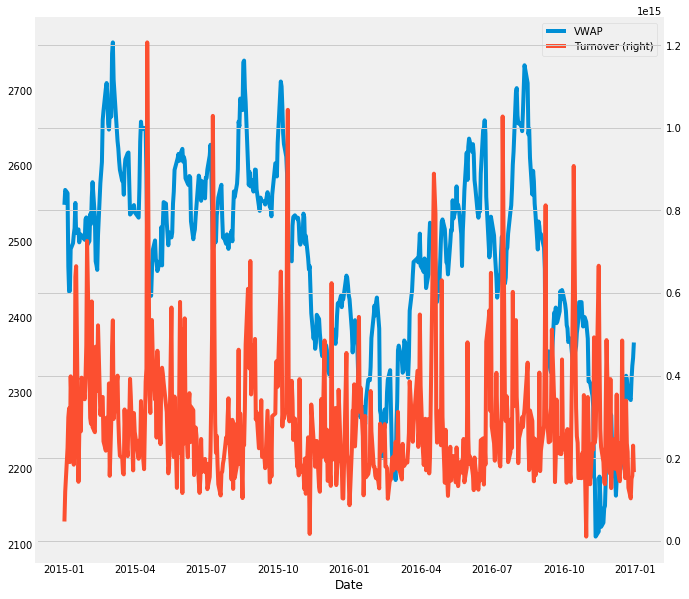

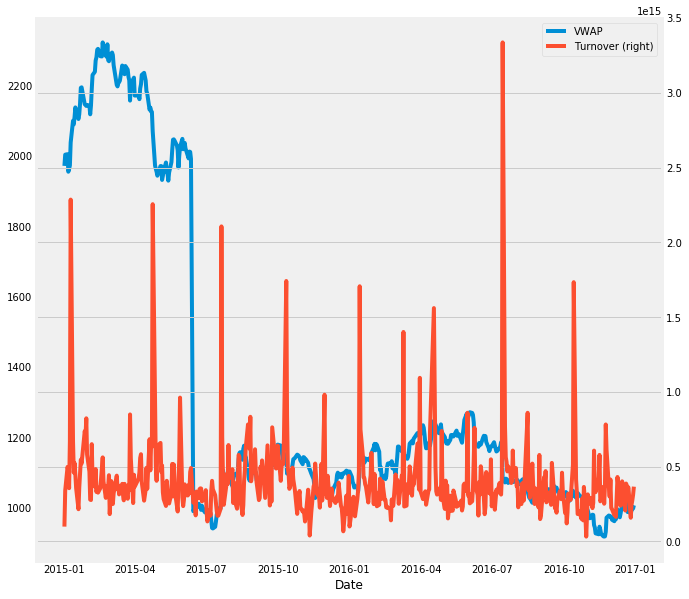

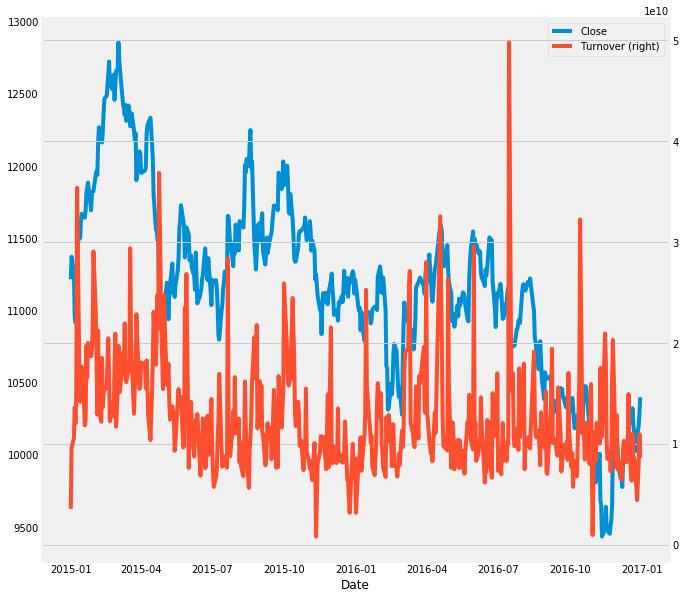

In [76]:
tcs = get_history(symbol='TCS',
                    start=date(2015,1,1), 
                    end=date(2017,1,1))
tcs[[ 'VWAP', 'Turnover']].plot(secondary_y='Turnover')

infy = get_history(symbol='INFY',
                    start=date(2015,1,1), 
                    end=date(2017,1,1))
infy[[ 'VWAP', 'Turnover']].plot(secondary_y='Turnover')

nifty = get_history(symbol="NIFTY IT", 
                    start=date(2015,1,1), 
                    end=date(2017,1,1),index=True)
nifty[['Close', 'Turnover']].plot(secondary_y='Turnover')




In [84]:
tcs.shape
tcs.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724


In [95]:
def movingaverage(dataFrame,periodDuration=[4, 16, 28, 40, 52],convertToWeeks=True):
    if convertToWeeks:
        dataFrame.index = pd.to_datetime(dataFrame.index)
        dataFrame = dataFrame.resample('W').mean()
        dataFrame.index.name = "Week start"
    movingaverage = pd.DataFrame()
    movingaverage["Close"] = dataFrame["Close"]
    for timePeriod in periodDuration:
        rm = dataFrame["Close"].rolling(timePeriod, min_periods = 1).mean()
        movingaverage[str(timePeriod) + " W.M Average"] = rm
    return movingaverage 

In [96]:
MAinfy = movingaverage(infy)
MAtcs = movingaverage(tcs)
MAniftyit = movingaverage(nifty)

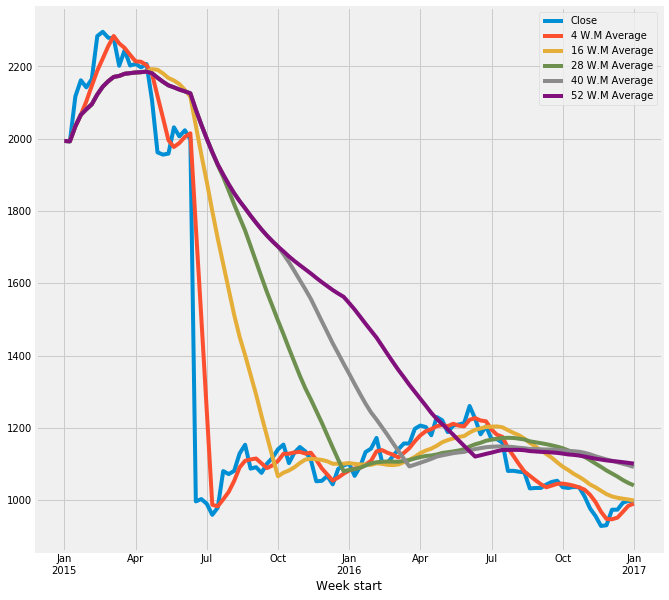

In [157]:
MAinfy.head(5)
MAinfy.plot()

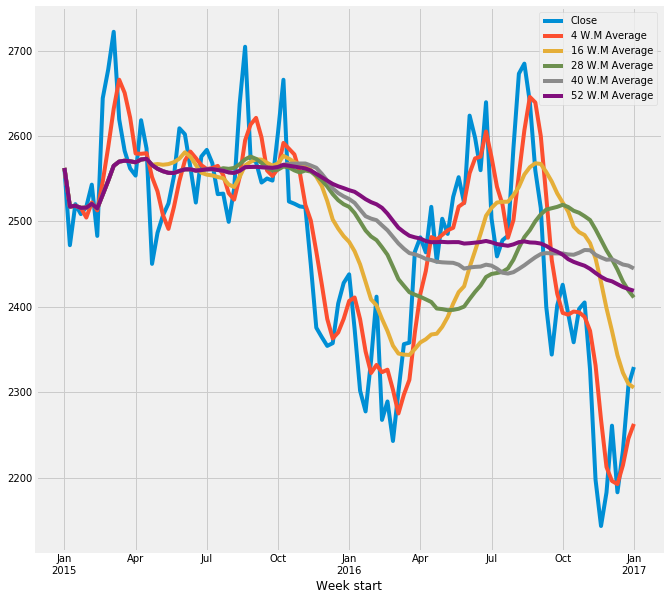

In [158]:
MAtcs.plot()

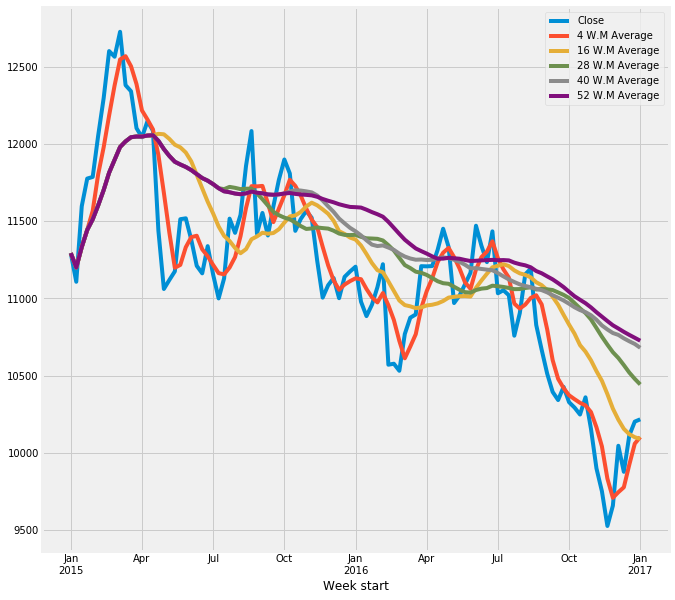

In [160]:
MAniftyit.plot()

In [99]:
tcs = tcs.asfreq('D', method ='pad')        # pad-ffill : forward-fill
infy = infy.asfreq('D', method ='pad')
nifty = nifty.asfreq('D', method ='pad')


Calculated Moving Averages: for 10 weeks: 

 Date
2015-01-01    2545.55
2015-01-02    2579.45
2015-01-03    2579.45
2015-01-04    2579.45
2015-01-05    2540.25
2015-01-06    2446.60
2015-01-07    2417.70
2015-01-08    2443.80
2015-01-09    2512.30
2015-01-10    2512.30
2015-01-11    2512.30
2015-01-12    2509.70
2015-01-13    2497.90
2015-01-14    2521.95
2015-01-15    2539.10
2015-01-16    2532.15
2015-01-17    2532.15
2015-01-18    2532.15
2015-01-19    2511.00
2015-01-20    2500.45
2015-01-21    2513.80
2015-01-22    2513.55
2015-01-23    2503.60
2015-01-24    2503.60
2015-01-25    2503.60
2015-01-26    2503.60
2015-01-27    2502.05
2015-01-28    2539.60
2015-01-29    2544.65
2015-01-30    2482.05
               ...   
2016-12-01    2263.45
2016-12-02    2221.85
2016-12-03    2221.85
2016-12-04    2221.85
2016-12-05    2186.00
2016-12-06    2182.35
2016-12-07    2154.55
2016-12-08    2195.75
2016-12-09    2195.25
2016-12-10    2195.25
2016-12-11    2195.25
2016-12-12    2208.20
2016

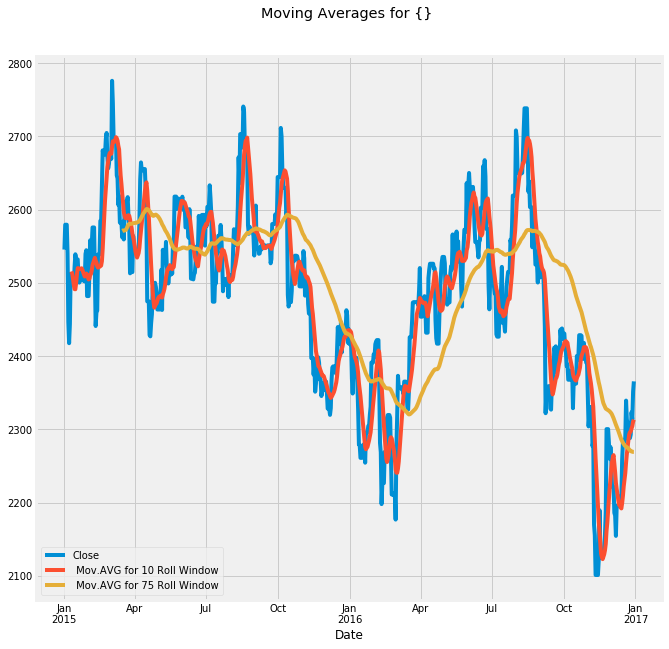

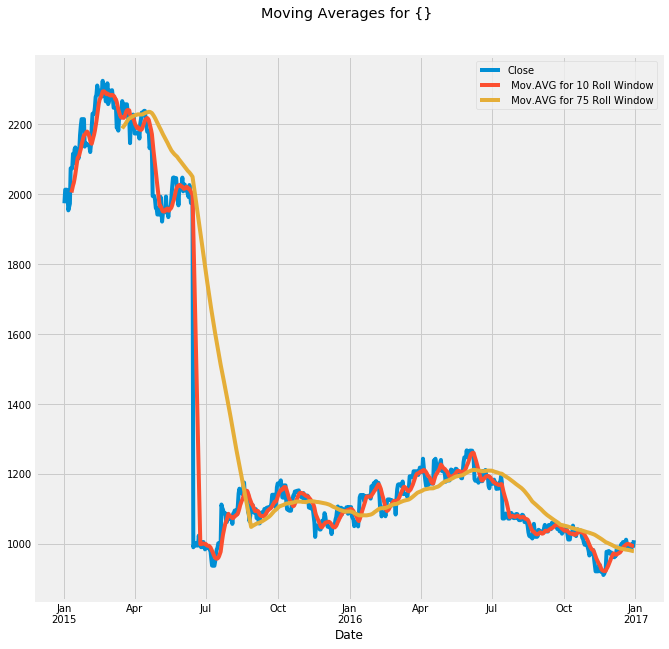

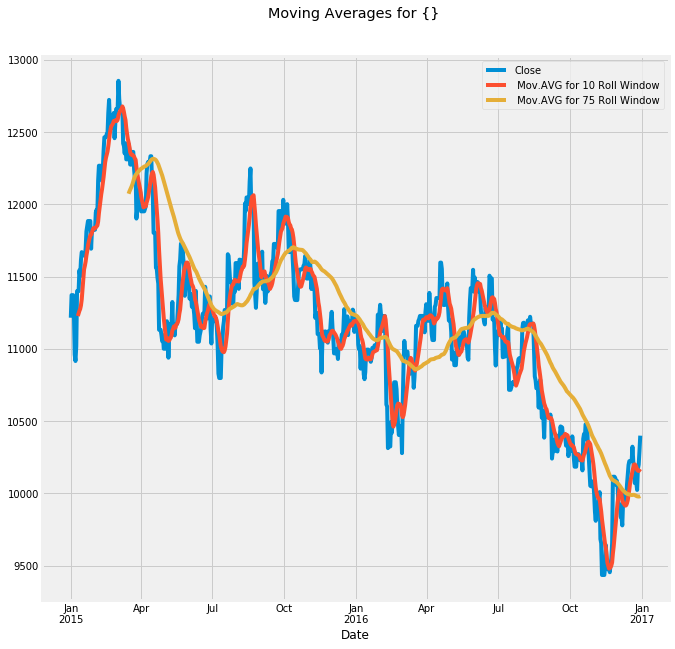

In [171]:
plot_roll_win(tcs)
plot_roll_win(infy)
plot_roll_win(nifty)

In [109]:

## Adding Volume Shock columns


def VolumeShock(dataFrame):
    dataFrame["Prev Volume"] = dataFrame["Volume"].shift(-1)
    dataFrame["Volume Shock"] = ((abs(dataFrame["Volume"] - dataFrame["Prev Volume"]) / dataFrame["Prev Volume"]) > 0.1).astype(int)
    return dataFrame

In [168]:
VolumeShock(tcs).head()
VolumeShock(infy).head()
VolumeShock(nifty).head()

,Open,High,Low,Close,Volume,Turnover,Prev Volume,Volume Shock,Volume Shock Direction
Date,,,,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,10004862.0,1,0.0
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,10004862.0,0,NaN
2015-01-03,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,10004862.0,0,NaN
2015-01-04,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,8858018.0,1,1.0
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,12515739.0,1,0.0


In [115]:

## Adding Direction of Volume Shock column

def VolumeShockDir(dataFrame):
    dataFrame["Volume Shock Direction"] = 'NaN'
    def getValue(row):
        if row["Volume Shock"] == 1:
            if row["Volume"] > row["Prev Volume"]:
                return 1
            else:
                return 0
        else:
            pass
    dataFrame["Volume Shock Direction"] = dataFrame.apply(getValue, axis=1)
    return dataFrame

In [167]:
VolumeShockDir(tcs).head()
VolumeShockDir(infy).head()
VolumeShockDir(nifty).head()

,Open,High,Low,Close,Volume,Turnover,Prev Volume,Volume Shock,Volume Shock Direction
Date,,,,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,10004862.0,1,0.0
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,10004862.0,0,NaN
2015-01-03,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,10004862.0,0,NaN
2015-01-04,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,8858018.0,1,1.0
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,12515739.0,1,0.0


In [123]:
 # Adding Price Shock Column

def PriceShock(dataFrame):
    dataFrame["Prev Closing"] = dataFrame["Close"].shift(-1)
    dataFrame["Price Shock"] = (abs((dataFrame["Close"] - dataFrame["Prev Closing"]) / dataFrame["Prev Closing"]) > 0.02).astype(int)
    return dataFrame

In [166]:
PriceShock(tcs).head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Deliverable Volume,%Deliverble,Prev Volume,Volume Shock,Volume Shock Direction,Prev Closing,Price Shock,Pricing Black Swan,Price Shock without Volume Shock,Price Shock Direction
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.0,2545.55,2548.51,183415,...,52870,0.2883,462870.0,1,0.0,2579.45,0,0,0,NaN
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.4,2579.45,2568.19,462870,...,309350,0.6683,462870.0,0,NaN,2579.45,0,0,0,NaN
2015-01-03,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.4,2579.45,2568.19,462870,...,309350,0.6683,462870.0,0,NaN,2579.45,0,0,0,NaN
2015-01-04,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.4,2579.45,2568.19,462870,...,309350,0.6683,877121.0,1,0.0,2540.25,0,0,0,NaN
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.1,2540.25,2563.94,877121,...,456728,0.5207,1211892.0,1,0.0,2446.60,1,1,0,1.0


In [130]:
## Adding Direction of Price black swan Column

def PriceBlackSwan(dataFrame):
    dataFrame["Pricing Black Swan"] = dataFrame["Price Shock"]
    return dataFrame

In [164]:
PriceBlackSwan(tcs).head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Deliverable Volume,%Deliverble,Prev Volume,Volume Shock,Volume Shock Direction,Prev Closing,Price Shock,Pricing Black Swan,Price Shock without Volume Shock,Price Shock Direction
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.0,2545.55,2548.51,183415,...,52870,0.2883,462870.0,1,0.0,2579.45,0,0,0,NaN
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.4,2579.45,2568.19,462870,...,309350,0.6683,462870.0,0,NaN,2579.45,0,0,0,NaN
2015-01-03,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.4,2579.45,2568.19,462870,...,309350,0.6683,462870.0,0,NaN,2579.45,0,0,0,NaN
2015-01-04,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.4,2579.45,2568.19,462870,...,309350,0.6683,877121.0,1,0.0,2540.25,0,0,0,NaN
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.1,2540.25,2563.94,877121,...,456728,0.5207,1211892.0,1,0.0,2446.60,1,1,0,1.0


In [152]:

### Adding Price Shock Direction Column

def PriceShockDirection(dataFrame):
    dataFrame["Price Shock Direction"] = 'NaN'
    def getValue(row):
        if row["Price Shock"] == 1:
            if row["Close"] > row["Prev Closing"]:
                return 1
            else:
                return 0
        else:
            pass
    dataFrame["Price Shock Direction"] = dataFrame.apply(getValue, axis=1)
    return dataFrame


In [165]:
PriceShockDirection(tcs).head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Deliverable Volume,%Deliverble,Prev Volume,Volume Shock,Volume Shock Direction,Prev Closing,Price Shock,Pricing Black Swan,Price Shock without Volume Shock,Price Shock Direction
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.0,2545.55,2548.51,183415,...,52870,0.2883,462870.0,1,0.0,2579.45,0,0,0,NaN
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.4,2579.45,2568.19,462870,...,309350,0.6683,462870.0,0,NaN,2579.45,0,0,0,NaN
2015-01-03,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.4,2579.45,2568.19,462870,...,309350,0.6683,462870.0,0,NaN,2579.45,0,0,0,NaN
2015-01-04,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.4,2579.45,2568.19,462870,...,309350,0.6683,877121.0,1,0.0,2540.25,0,0,0,NaN
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.1,2540.25,2563.94,877121,...,456728,0.5207,1211892.0,1,0.0,2446.60,1,1,0,1.0


In [ ]:
### Adding Price ShockWoVol Shock Column
def PriceShockWoVolShock(dataFrame):
    dataFrame["Price Shock without Volume Shock"] = dataFrame["Price Shock"] & (~(dataFrame["Volume Shock"].astype(bool))).astype(int)
    return dataFrame

In [153]:
PriceShockWoVolShock(tcs)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Trades,Deliverable Volume,%Deliverble,Prev Volume,Volume Shock,Volume Shock Direction,Prev Closing,Price Shock,Pricing Black Swan,Price Shock without Volume Shock
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.00,2567.00,2541.00,2550.00,2545.55,2548.51,183415,...,8002,52870,0.2883,462870.0,1,0.0,2579.45,0,0,0
2015-01-02,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,...,27585,309350,0.6683,462870.0,0,NaN,2579.45,0,0,0
2015-01-03,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,...,27585,309350,0.6683,462870.0,0,NaN,2579.45,0,0,0
2015-01-04,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,...,27585,309350,0.6683,877121.0,1,0.0,2540.25,0,0,0
2015-01-05,TCS,EQ,2579.45,2581.00,2599.90,2524.65,2538.10,2540.25,2563.94,877121,...,43234,456728,0.5207,1211892.0,1,0.0,2446.60,1,1,0
2015-01-06,TCS,EQ,2540.25,2529.10,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,...,84503,714306,0.5894,1318166.0,0,NaN,2417.70,0,0,0
2015-01-07,TCS,EQ,2446.60,2470.00,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,...,101741,886368,0.6724,782704.0,1,1.0,2443.80,0,0,0
2015-01-08,TCS,EQ,2417.70,2442.40,2449.00,2420.55,2446.00,2443.80,2434.81,782704,...,47699,450768,0.5759,1598821.0,1,0.0,2512.30,1,1,0
2015-01-09,TCS,EQ,2443.80,2455.00,2519.90,2450.00,2510.00,2512.30,2490.01,1598821,...,81743,865777,0.5415,1598821.0,0,NaN,2512.30,0,0,0
